In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_excel('DATASET.xlsx')

1. Data Preprocessing

In [4]:
#the complete 10 step data not available for one case, so remove it
df3=df.copy()
df3.drop([910,911,912,913,914,915,916,917,918], axis=0, inplace=True)

In [5]:
#some values are nan so remove them
df3=df3.fillna(0)

2. Data Preparation

In [6]:
data=np.array(df3[['Para-9','Para-10','Para-11','Para-12','Para-13']])

In [7]:
#MinMax Scalar
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(data)

In [8]:
#Prepare data in input-output format for model traininng
Y=[]
X=[]
id=0
for index in range(0,1000):
  if(id==9):
    id=0
    Y=np.append(Y,training_set_scaled[index])
  else:
    X=np.append(X,training_set_scaled[index])
    id=id+1

#Set data in the format of LSTM 
X_series=np.reshape(X,(100,9,5))#Inpur 5 parameters(9-13) values of 9 days with 100 such instances
Y_series=np.reshape(Y,(100,5))# Output 5 paramater values(9-13) for 10th day

In [9]:
X_train, X_test, Y_train, Y_test=train_test_split(X_series,Y_series,test_size=0.2, random_state=13)

3. Model Selection and Training

In [10]:
#LSTM training
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import optimizers
np.random.seed(13) 
tf.random.set_seed(13)

regressor = Sequential()

regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (9,5)))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 32))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 5,activation='relu'))

optimizer=tf.keras.optimizers.Adam(clipvalue=0.5)
regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')

regressor.fit(X_train, Y_train, epochs = 600, batch_size = 64)

Epoch 1/600
2/2 [==============================] - 3s 13ms/step - loss: 0.0627
Epoch 2/600
2/2 [==============================] - 0s 12ms/step - loss: 0.0585
Epoch 3/600
2/2 [==============================] - 0s 12ms/step - loss: 0.0549
Epoch 4/600
2/2 [==============================] - 0s 15ms/step - loss: 0.0499
Epoch 5/600
2/2 [==============================] - 0s 20ms/step - loss: 0.0464
Epoch 6/600
2/2 [==============================] - 0s 12ms/step - loss: 0.0404
Epoch 7/600
2/2 [==============================] - 0s 12ms/step - loss: 0.0341
Epoch 8/600
2/2 [==============================] - 0s 14ms/step - loss: 0.0294
Epoch 9/600
2/2 [==============================] - 0s 13ms/step - loss: 0.0265
Epoch 10/600
2/2 [==============================] - 0s 11ms/step - loss: 0.0260
Epoch 11/600
2/2 [==============================] - 0s 14ms/step - loss: 0.0243
Epoch 12/600
2/2 [==============================] - 0s 12ms/step - loss: 0.0257
Epoch 13/600
2/2 [==============================]

In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 64)             17920     
                                                                 
 dropout (Dropout)           (None, 9, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 30,501
Trainable params: 30,501
Non-trainable params: 0
_________________________________________________________________


4. Model Evaluation

In [12]:
regressor.evaluate(X_test,Y_test)

1/1 [==============================] - 1s 701ms/step - loss: 0.0034


0.0033737451303750277

In [13]:
predicted = regressor.predict(X_test)
predicted= sc.inverse_transform(predicted)#Recslace the values back to original Scale
actual=sc.inverse_transform(Y_test)#Recslace the values back to original Scale

In [14]:
rms_error=np.sqrt(np.mean((predicted-actual)**2))
print(rms_error)

22.455414643749553


In [15]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(actual,predicted))
print(rmse)

22.455414643749553


Text(0.5, 1.0, 'True Vs Predicted Plot')

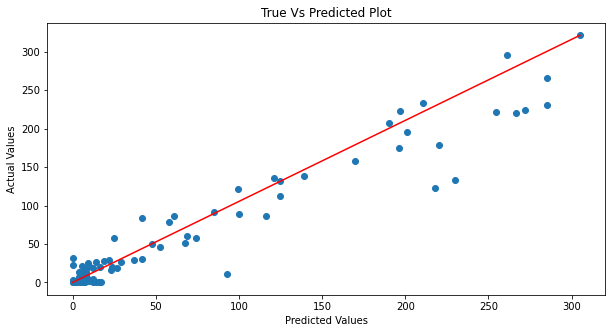

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
act=actual.reshape((100,1))
pred=predicted.reshape((100,1))
plt.scatter(actual,pred)
plt.plot([act.min(),act.max()],[pred.min(),pred.max()],color='red')
plt.title("True Vs Predicted Plot")

Text(0.5, 1.0, 'Predictions for all 5 parameters')

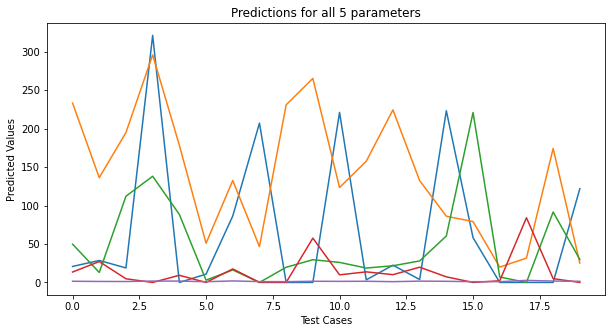

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.ylabel('Predicted Values')
plt.xlabel('Test Cases')
plt.plot(predicted)
plt.title("Predictions for all 5 parameters")

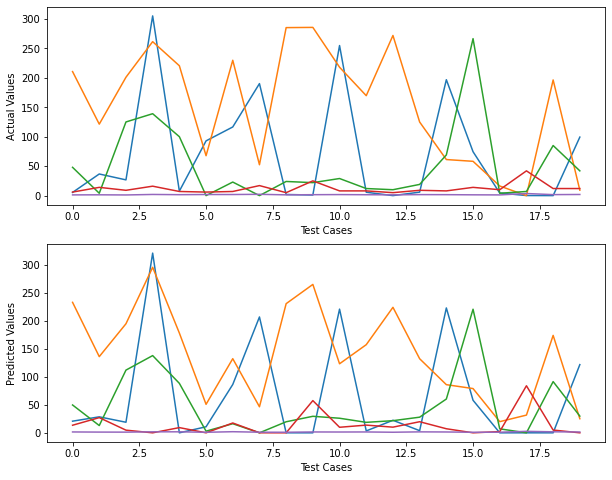

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Actual Values')
ax1.set_xlabel('Test Cases')

ax1.plot(actual)

ax2 = fig.add_subplot(212)
ax2.set_ylabel('Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.plot(predicted)

plt.show()


Text(0.5, 1.0, 'True and Predicted Value Graph')

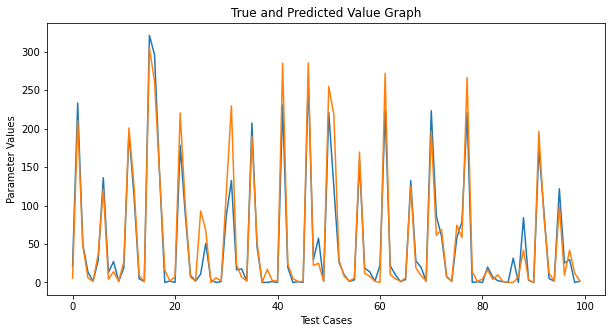

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.ylabel('Parameter Values')
plt.xlabel('Test Cases')
plt.plot(predicted.reshape((100,1)))
plt.plot(actual.reshape((100,1)))
plt.title("True and Predicted Value Graph")